## Постановка задачи:

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Классификацию будем проводить по типу отеля: "городской" или "курортный".

Установливаем библиотеку Pandas:

In [ ]:
! pip install pandas

Импортируем необходимые модули:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [69]:
data = pd.read_csv('./hotel_booking.csv', sep = ',', header=0, engine = 'python')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


### О наборе данных:

Контекст:

Этот набор данных содержит 119390 наблюдений для городского отеля и курортного отеля. Каждое наблюдение представляет собой бронирование отеля в период с 1 июля 2015 г. по 31 августа 2017 г., включая бронирование, которое фактически было получено, и бронирование, которое было отменено.

Содержание:

Поскольку это реальные данные отеля, все элементы данных, относящиеся к отелю или идентификации клиента, были удалены.
Четыре столбца: «имя», «электронная почта», «номер телефона» и «кредитная карта» были искусственно созданы и добавлены в набор данных.

Благодарности:

Данные взяты из статьи «Наборы данных о спросе на бронирование отелей», написанной Нуно Антонио, Аной Алмейдой и Луисом Нуньесом для Data in Brief, том 22, февраль 2019 г.

- `hotel` - Наборы данных содержат информацию о бронировании двух отелей. Один из отелей является курортным, а другой — городским.
- `is_canceled` - Значение, указывающее, было ли бронирование отменено (1) или нет (0).
- `lead_time` - Количество дней, прошедших между датой ввода бронирования в PMS и датой прибытия.
- `arrival_date_year` - Год даты прибытия.
- `arrival_date_month` - Месяц даты прибытия с 12 категориями: от «января» до «декабря».
- `arrival_date_week_number` - Номер недели даты прибытия.
- `arrival_date_day_of_month` - День месяца даты прибытия.
- `stays_in_weekend_nights` - Количество ночей в выходные дни (суббота или воскресенье), в течение которых гость останавливался или забронировал проживание в отеле.
- `stays_in_week_nights` - Количество ночей в неделю (с понедельника по пятницу), в течение которых гость останавливался или забронировал проживание в отеле BO и BL/Рассчитывается путем подсчета.
- `adults` - Количество взрослых.
- `children` - Количество детей.
- `babies` - Количество младенцев.
- `meal` - BB – Bed & Breakfast.
- `country` - Страна происхождения.
- `market_segment` - Обозначение сегмента рынка. В категориях термин «ТА» означает «Туристические агенты», а «ТО» означает «Туристические операторы».
- `distribution_channel` - Канал распространения бронирования. Термин «ТА» означает «Туристические агенты», а «ТО» означает «Туристические операторы».
- `is_repeated_guest` - Значение, указывающее, было ли имя бронирования от повторного гостя (1) или нет (0).
- `previous_cancellations` - Количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования.
- `previous_bookings_not_canceled` - Количество предыдущих бронирований, не отмененных клиентом до текущего бронирования.
- `reserved_room_type` - Код типа зарезервированного номера. Код представлен вместо обозначения из соображений анонимности.
- `assigned_room_type` - Код типа номера, присвоенного бронированию. Иногда назначенный тип номера отличается от зарезервированного типа номера по причинам, связанным с работой отеля (например, избыточное бронирование) или по желанию клиента. Код представлен вместо обозначения из соображений анонимности.
- `booking_changes` - Количество изменений/поправок, внесенных в бронирование с момента ввода бронирования в PMS до момента заселения или отмены.
- `deposit_type` - No Deposit – депозит не вносился; Non Refund – внесен залог в размере полной стоимости проживания; Возвратный – был внесен депозит в размере под общую стоимость проживания.
- `agent` - Идентификатор туристического агентства, оформившего бронирование.
- `company` - Идентификатор компании/организации, которая сделала бронирование или ответственна за оплату бронирования. Идентификатор представлен вместо обозначения из соображений анонимности.
- `days_in_waiting_list` - Количество дней, в течение которых бронирование находилось в списке ожидания, прежде чем оно было подтверждено клиенту.
- `customer_type` - Группа – когда бронирование связано с группой; Временное — когда бронирование не является частью группы или контракта и не связано с другим временным бронированием; Transient-party — когда бронирование является временным, но связано как минимум с другим временным бронированием.
- `adr` - Средняя дневная ставка (рассчитывается путем деления суммы всех транзакций по размещению на общее количество ночей проживания).
- `required_car_parking_spaces` - Количество парковочных мест, необходимых клиенту.
- `total_of_special_requests` - Количество специальных запросов, сделанных клиентом (например, две односпальные кровати или верхний этаж).
- `reservation_status` - Check-Out – клиент зарегистрировался, но уже ушел; No-Show – клиент не зарегистрировался и не сообщил о причине.
- `reservation_status_date` - Дата, когда был установлен последний статус. Эту переменную можно использовать в сочетании с ReservationStatus, чтобы понять, когда было отменено бронирование или когда клиент выписался из отеля.
- `name` - Имя гостя (ненастоящее).
- `email` - Электронная почта (ненастоящая).
- `phone-number` - Номер телефона (ненастоящий).
- `credit_card` - Номер кредитной карты (ненастоящий).

Ознакомимся с некоторыми свойствами Pandas.DataFrame на примере нашего dataset-а:

In [ ]:
print(data.shape, end="\n\n")
print(data.columns, end="\n\n")
print(data.index, end="\n\n")
print(data.at[2, 'email'], end="\n\n")
print(data["email"][2], end="\n\n")
print(data["email"].dtype, end="\n\n")
print(type(data["email"]), end="\n\n")
print(type(data["email"][2]), end="\n\n")

(4920, 36)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

RangeIndex(start=0, stop=4920, step=1)

Rebecca_Parker@comcast.net

Rebecca_Parker@comcast.net

object

<class 'pandas.core.series.Series'>

<class 'str'>



Выведем описательную статистику по нашему dataset-у:

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.0,4920.0,4920.0,4920.000000,4109.000000,291.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.455081,73.691057,2015.240244,31.722967,15.553659,1.194512,3.289228,1.972154,0.117480,0.014837,0.0,0.0,0.0,0.208333,208.178876,242.213058,1.800813,87.877305,0.095122,0.609350
std,0.498029,61.891715,0.427275,13.995653,9.200438,1.197922,2.511750,1.578030,0.448189,0.122584,0.0,0.0,0.0,0.608849,81.690914,78.924425,13.653160,50.586001,0.294796,0.825637
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,2015.000000,27.000000,7.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,175.000000,223.000000,0.000000,50.000000,0.000000,0.000000
50%,0.000000,62.000000,2015.000000,34.000000,15.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,268.000000,0.000000,73.500000,0.000000,0.000000
75%,1.000000,109.000000,2015.000000,43.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,241.000000,281.000000,0.000000,118.290000,0.000000,1.000000
max,1.000000,737.000000,2016.000000,53.000000,31.000000,13.000000,33.000000,55.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,387.000000,383.000000,122.000000,332.000000,2.000000,4.000000


In [ ]:
data.describe(include = ['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,4920,4920,4920,4918,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4919
unique,1,10,5,56,6,3,9,10,3,4,3,355,4763,4914,4920,3779
top,Resort Hotel,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-10,Michael Smith,James_B@hotmail.com,669-792-1661,************4769
freq,4920,842,3400,3137,2142,3639,3134,2504,4417,3642,2681,70,4,2,1,5


In [ ]:
data.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,4920,4920.000000,4920.000000,4920.000000,4920,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920,4920.000000,4920.000000,4920.000000,4920,4920,4920,4920,4920,4919
unique,1,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,3,355,4763,4914,4920,3779
top,Resort Hotel,NaN,NaN,NaN,July,NaN,NaN,NaN,NaN,NaN,...,Transient,NaN,NaN,NaN,Check-Out,2015-10-10,Michael Smith,James_B@hotmail.com,669-792-1661,************4769
freq,4920,NaN,NaN,NaN,842,NaN,NaN,NaN,NaN,NaN,...,3642,NaN,NaN,NaN,2681,70,4,2,1,5
mean,NaN,0.455081,73.691057,2015.240244,NaN,31.722967,15.553659,1.194512,3.289228,1.972154,...,NaN,87.877305,0.095122,0.609350,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.498029,61.891715,0.427275,NaN,13.995653,9.200438,1.197922,2.511750,1.578030,...,NaN,50.586001,0.294796,0.825637,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,28.000000,2015.000000,NaN,27.000000,7.000000,0.000000,1.000000,2.000000,...,NaN,50.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,62.000000,2015.000000,NaN,34.000000,15.000000,1.000000,3.000000,2.000000,...,NaN,73.500000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,109.000000,2015.000000,NaN,43.000000,24.000000,2.000000,5.000000,2.000000,...,NaN,118.290000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


Выведем частичную матрицу графиков рессеивания:

In [ ]:
numeric_colums = [i for i in data if data[i].dtype.name != 'object']
first_part = numeric_colums[0:5]

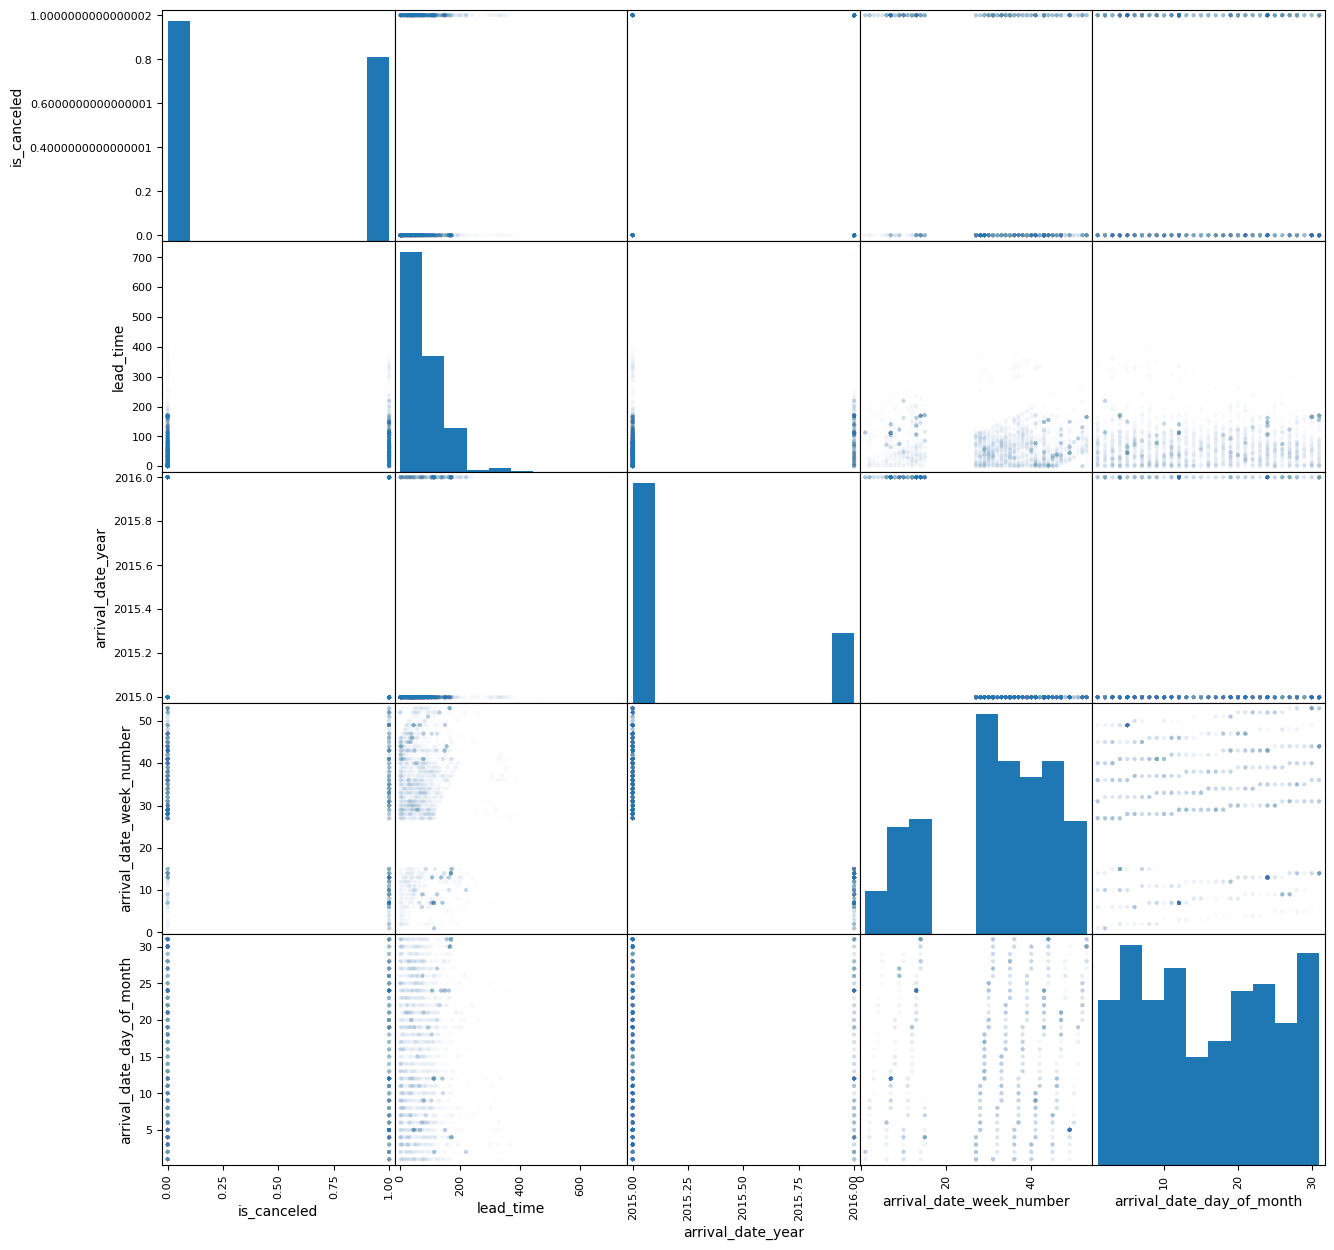

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[first_part], alpha = .01, figsize = (15, 15))
pass

Выведем матрицу корреляции наших численных признаков:

In [ ]:
data.corr(numeric_only=True)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.074888,0.288605,-0.239298,-0.030375,0.025723,-0.002207,0.045616,0.027289,-0.030705,NaN,NaN,NaN,-0.179985,-0.036587,-0.286076,-0.113253,-0.048341,-0.294905,-0.078775
lead_time,0.074888,1.000000,0.213259,-0.136831,0.030462,0.198498,0.262474,0.213881,-0.077622,-0.010221,NaN,NaN,NaN,0.010297,-0.107277,0.035459,0.147506,-0.192095,-0.118089,-0.094321
arrival_date_year,0.288605,0.213259,1.000000,-0.875609,0.004063,-0.080196,-0.045248,-0.028066,-0.030638,-0.056426,NaN,NaN,NaN,-0.029891,-0.033563,-0.273425,-0.074177,-0.295795,-0.136274,-0.165534
arrival_date_week_number,-0.239298,-0.136831,-0.875609,1.000000,0.095287,0.029442,0.001597,0.006048,-0.020219,0.032612,NaN,NaN,NaN,0.055276,0.039925,0.393774,0.181536,0.015760,0.091680,0.086884
arrival_date_day_of_month,-0.030375,0.030462,0.004063,0.095287,1.000000,-0.131844,-0.052975,-0.017659,0.006211,-0.007826,NaN,NaN,NaN,-0.003974,0.051518,-0.029106,0.163809,0.022492,0.002390,0.021788
stays_in_weekend_nights,0.025723,0.198498,-0.080196,0.029442,-0.131844,1.000000,0.733156,0.025987,0.028615,0.014952,NaN,NaN,NaN,0.047280,-0.154983,0.039938,-0.084030,0.062767,-0.039739,0.038201
stays_in_week_nights,-0.002207,0.262474,-0.045248,0.001597,-0.052975,0.733156,1.000000,0.009623,0.037711,0.004547,NaN,NaN,NaN,0.104691,-0.078908,0.147529,0.037035,0.080326,-0.055558,0.021066
adults,0.045616,0.213881,-0.028066,0.006048,-0.017659,0.025987,0.009623,1.000000,0.008938,0.001085,NaN,NaN,NaN,-0.024007,-0.080202,0.060136,-0.017855,-0.005545,-0.000423,-0.009287
children,0.027289,-0.077622,-0.030638,-0.020219,0.006211,0.028615,0.037711,0.008938,1.000000,0.001569,NaN,NaN,NaN,0.065994,0.058621,0.157061,-0.034580,0.277267,0.050806,0.033400
babies,-0.030705,-0.010221,-0.056426,0.032612,-0.007826,0.014952,0.004547,0.001085,0.001569,1.000000,NaN,NaN,NaN,0.062081,0.001609,0.104943,-0.015968,0.064394,0.034069,0.177799


По данной матрице можно сделать вывод, что в общей массе корреляция между признаками достаточно мала (исключение составляют, например, признаки `stays_in_week_nights` и `stays_in_weekend_nights`).

Визуализируем данную матрицу корреляции:

In [ ]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

<Axes: >

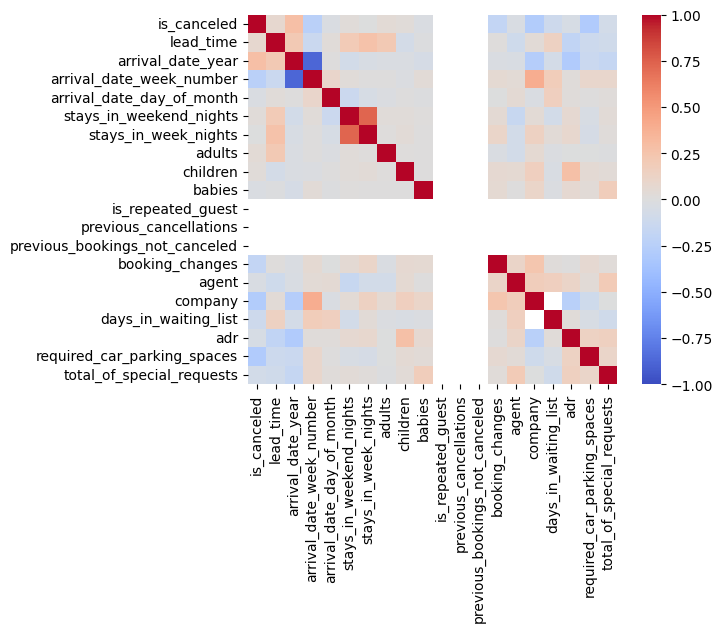

In [ ]:
corr_mat = data.corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Визуализируем некоторые графики корреляции:

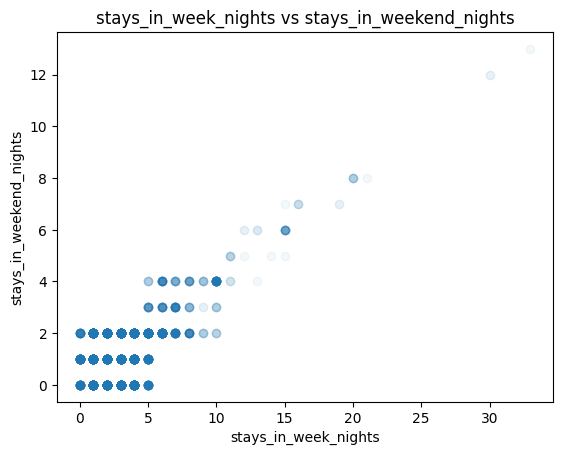

In [ ]:
plt.plot(data['stays_in_week_nights'], data['stays_in_weekend_nights'], 'o', alpha = 0.05)
plt.xlabel('stays_in_week_nights')
plt.ylabel('stays_in_weekend_nights')
plt.title('stays_in_week_nights vs stays_in_weekend_nights')
pass

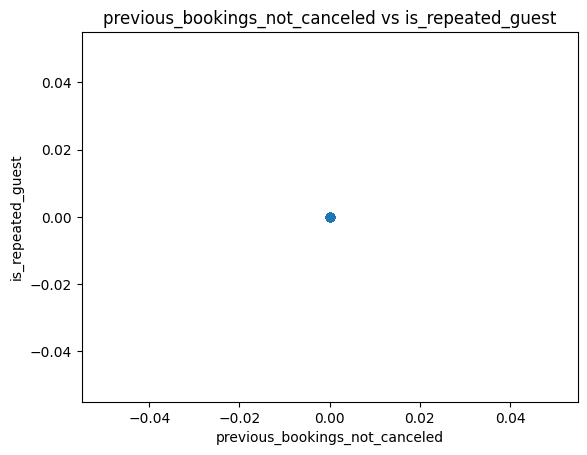

In [ ]:
plt.plot(data['previous_bookings_not_canceled'], data['is_repeated_guest'], 'o', alpha = 0.05)
plt.xlabel('previous_bookings_not_canceled')
plt.ylabel('is_repeated_guest')
plt.title('previous_bookings_not_canceled vs is_repeated_guest')
pass

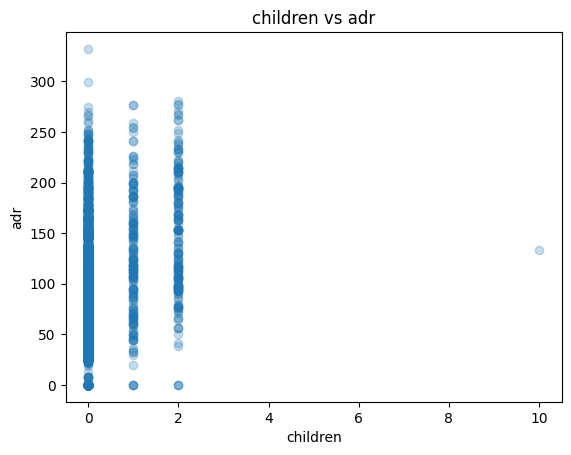

In [ ]:
plt.plot(data['children'], data['adr'], 'o', alpha = 0.25)
plt.xlabel('children')
plt.ylabel('adr')
plt.title('children vs adr')
pass

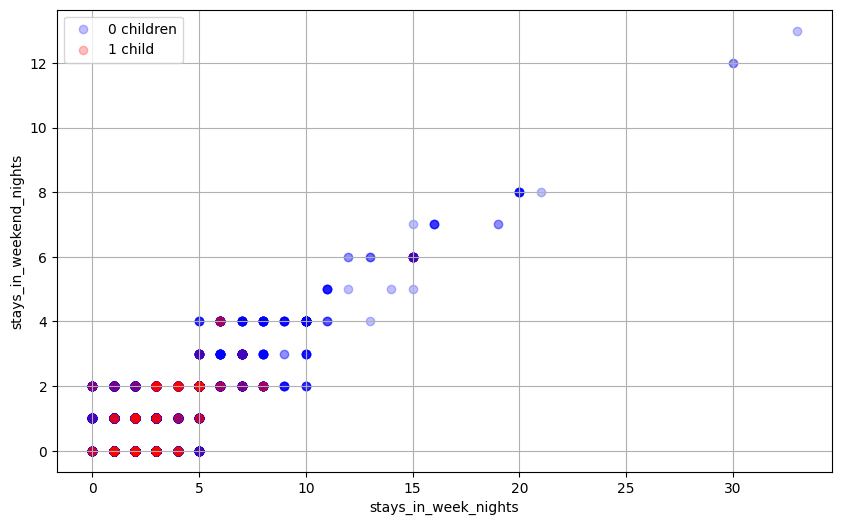

In [ ]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['children'] == 0]['stays_in_week_nights'],
            data[data['children'] == 0]['stays_in_weekend_nights'],
            alpha = 0.25,
            label = '0 children',
            color = 'b')

plt.scatter(data[data['children'] == 1]['stays_in_week_nights'],
            data[data['children'] == 1]['stays_in_weekend_nights'],
            alpha = 0.25,
            label = '1 child',
            color = 'r')

plt.xlabel('stays_in_week_nights')
plt.ylabel('stays_in_weekend_nights')
plt.legend()
plt.grid()

По данным графикам можно, например, установить, что число отдыхающих без детей много больше, чем число отдыхающих с 1-м ребенком.
Или, например, что чем больше у клиентов бронирований без отмены, тем с большей вероятностью, они действительно заселятся в отель.

Выведем уникальные значения для некоторых нечисловых признаков:

In [ ]:
data['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P'], dtype=object)

In [ ]:
data['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], dtype=object)

## Готовим данные

Рассортируем категориальные и численные признаки:

In [70]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


Выведем все уникальные значения для каждого категориального признака:

In [71]:
for c in categorical_columns:
    print(f"{c}: {data[c].unique()}")

hotel: ['Resort Hotel' 'City Hotel']
arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH'

Отсутствующие значения `agent` и `company` заменим на 0:

In [72]:
data["agent"] = data["agent"].fillna(0, axis=0)
data["company"] = data["company"].fillna(0, axis=0)

Отсутствующие значения поля `country` заменим на значение моды данного признака:

In [73]:
data["country"] = data["country"].fillna(data["country"].mode, axis=0)

Разделим категориальные признаки на бинарные и небинарные:

In [74]:
binary_columns    = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['hotel'] ['arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']


Для бинарного признака заменим значения на 0 и 1:

In [75]:
data.loc[data['hotel'] == 'Resort Hotel', 'hotel'] = 0
data.loc[data['hotel'] == 'City Hotel', 'hotel'] = 1

Как можно заметить, у нас есть 4 категориальных признака, которые обладают большим количеством уникальных значей (`name`, `email`, `phone-number`, `credit_card`). Их векторизация - занятие сомнительное, поэтому просто уберем их из нашего dataset-а:

In [76]:
data = data.drop(labels=["name", "email", "phone-number", "credit_card"], axis=1)
data



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,1,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,1,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,1,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [77]:
nonbinary_columns.remove("name")
nonbinary_columns.remove("email")
nonbinary_columns.remove("phone-number")
nonbinary_columns.remove("credit_card")
nonbinary_columns


['arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

К небинарным признакам применим метод векторизации:

In [78]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
data_nonbinary

,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
119386,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
119387,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
119388,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Нормализуем количественные признаки (это полезно, т.к. мы будем использовать, в том числе, метод ближайших соседей):

In [79]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193860e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,-5.332493e-17,3.618477e-17,-8.429909e-14,-1.847328e-16,6.094277e-17,-1.225997e-17,4.427873e-17,-5.522939e-17,4.285182e-17,-1.356929e-17,4.570708e-17,3.332808e-18,2.571023e-17,-2.380577e-17,1.142677e-17,1.428346e-17,4.094593e-17,2.818603e-16,-3.142362e-17,-4.951600e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.670373e-01,-9.733146e-01,-1.634761e+00,-1.923183e+00,-1.685290e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606622e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-6.984035e-01,-1.997475e-01,-1.319230e-01,-2.141277e+00,-2.548718e-01,-7.206911e-01
25%,-7.670373e-01,-8.048748e-01,-2.212855e-01,-8.206585e-01,-8.880985e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-6.330697e-01,-1.997475e-01,-1.319230e-01,-6.439223e-01,-2.548718e-01,-7.206911e-01
50%,-7.670373e-01,-3.276287e-01,-2.212855e-01,6.136116e-02,2.297721e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-6.144028e-01,-1.997475e-01,-1.319230e-01,-1.435838e-01,-2.548718e-01,-7.206911e-01
75%,1.303707e+00,5.239281e-01,1.192190e+00,7.963776e-01,8.201684e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,7.202751e-01,-1.997475e-01,-1.319230e-01,4.782527e-01,-2.548718e-01,5.406636e-01
max,1.303707e+00,5.923360e+00,1.192190e+00,1.898902e+00,1.731244e+00,1.809749e+01,2.489129e+01,9.174379e+01,2.482957e+01,1.025497e+02,5.507786e+00,3.069024e+01,4.799061e+01,3.185451e+01,4.294972e+00,9.866269e+00,2.209065e+01,1.048399e+02,3.235943e+01,5.586082e+00


Cоеднияем все данные:

In [80]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
data.describe(include="all")

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14,hotel
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193860e+05,1.193900e+05,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79330.0
mean,-5.332493e-17,3.618477e-17,-8.429909e-14,-1.847328e-16,6.094277e-17,-1.225997e-17,4.427873e-17,-5.522939e-17,4.285182e-17,-1.356929e-17,...,0.000310,0.000176,0.000134,0.000159,0.000034,0.000050,0.000034,0.000008,0.000017,NaN
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.017602,0.013261,0.011576,0.012614,0.005788,0.007089,0.005788,0.002894,0.004093,NaN
min,-7.670373e-01,-9.733146e-01,-1.634761e+00,-1.923183e+00,-1.685290e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606622e-01,-8.157892e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,-7.670373e-01,-8.048748e-01,-2.212855e-01,-8.206585e-01,-8.880985e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,-7.670373e-01,-3.276287e-01,-2.212855e-01,6.136116e-02,2.297721e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,1.303707e+00,5.239281e-01,1.192190e+00,7.963776e-01,8.201684e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


Разбиваем наши данные на y и x:

In [81]:
X = data.drop('hotel', axis = 1)
y = data['hotel']
feature_names = X.columns
print(feature_names)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies',
       ...
       'reservation_status_date_2017-09-03',
       'reservation_status_date_2017-09-04',
       'reservation_status_date_2017-09-05',
       'reservation_status_date_2017-09-06',
       'reservation_status_date_2017-09-07',
       'reservation_status_date_2017-09-08',
       'reservation_status_date_2017-09-09',
       'reservation_status_date_2017-09-10',
       'reservation_status_date_2017-09-12',
       'reservation_status_date_2017-09-14'],
      dtype='object', length=1186)


In [82]:
X=X.to_numpy()
y=y.to_numpy()

In [83]:
print(X, end="\n\n")
print(y, end="\n\n")
print(X.shape, end="\n\n")
print(y.shape, end="\n\n")
N, d = X.shape

[[-0.76703728  2.2270418  -1.6347611  ...  0.          0.
   0.        ]
 [-0.76703728  5.9233599  -1.6347611  ...  0.          0.
   0.        ]
 [-0.76703728 -0.90781026 -1.6347611  ...  0.          0.
   0.        ]
 ...
 [-0.76703728 -0.65515055  1.19219015 ...  0.          0.
   0.        ]
 [-0.76703728  0.04668201  1.19219015 ...  0.          0.
   0.        ]
 [-0.76703728  0.94502767  1.19219015 ...  0.          0.
   0.        ]]

[0 0 0 ... 1 1 1]

(119390, 1186)

(119390,)



Разделим наш dataset на обучающую и тестовую выборку:

In [ ]:
import sys
!{sys.executable} -m pip install scikit-learn

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

83573 35817 (83573,) (35817,)


Оказалось, что наши данные содержат незначительное количество полей типа nan. Заменим их на данные из других строк таблицы (таких значения всего 4, на общую картину это никак не повлияет):

In [86]:
print(np.argwhere(np.isnan(X_train)))
for i, j in np.argwhere(np.isnan(X_train)):
    X_train[i][j] = X_train[0][j]

print(np.argwhere(np.isnan(X_test)))
for i, j in np.argwhere(np.isnan(X_test)):
    X_test[i][j] = X_test[0][j]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[[33938     8]]
[[13445     8]
 [14265     8]
 [33182     8]]
(83573, 1186)
(83573,)
(35817, 1186)
(35817,)


Интерпретируем все значения `y` как целые числа:

In [87]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

In [89]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [91]:
print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.030572074713125053
err_test=0.03757992014964961


In [92]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[26500  1508]
 [ 1047 54518]]

[[11240   812]
 [  534 23231]]



Попробуем теперь подобрать параметры так, чтобы еще сильнее уменьшить ошибку (работает очень медленно):

In [ ]:
#from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
#grid.fit(X_train, y_train)

#best_cv_err = 1 - grid.best_score_
#best_n_neighbors = grid.best_estimator_.n_neighbors
#print(best_cv_err, best_n_neighbors)

Лучший результат достигается при n=3:

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

## Другие алгоритмы обучения:

### SVC (работает очень медленно):

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.07982243068933746
err_test=0.0785939637602256


### Random Forest:

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.0
err_test=0.013094340676215205


### Extremely Randomized Trees:

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.0
err_test=0.018510763045481195


### AdaBoost (работает очень медленно):

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.0197791152644993
err_test=0.02331295195019125


### GBT (работает очень медленно):

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.00929726107714214
err_test=0.013094340676215205


Наилуший результат показывает Random Forest и GBT. Ошибка на тестовой выборке состовляет ~ 0.013. При этом, на обучение алгоритмом Random Forest затрачивается намного меньше вермени.

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о небольшом переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.


## Продолжение


### Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

err_train=0.06286719395019923
err_test=0.065778820113354

train confusion matrix:
[[24889  3119]
 [ 2135 53430]]

test confusion matrix:
[[10658  1394]
 [  962 22803]]



### Random Forest (еще раз)

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

err_train=0.0
err_test=0.012815143646871597

train confusion matrix:
[[28008     0]
 [    0 55565]]

test confusion matrix:
[[11795   257]
 [  202 23563]]



### Полносвязная неглубокая нейронная сеть (adam solver)

In [94]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (20,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 7, max_iter=100)

mlp_model.fit(X_train, y_train)

y_test_predict = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


err_train=0.002046115372189583
err_test=0.01711477789876316

train confusion matrix:
[[27925    83]
 [   88 55477]]

test confusion matrix:
[[11739   313]
 [  300 23465]]



In [ ]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (20,), 
                              solver = 'adam', activation = 'logistic', max_iter=100, random_state = 7)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

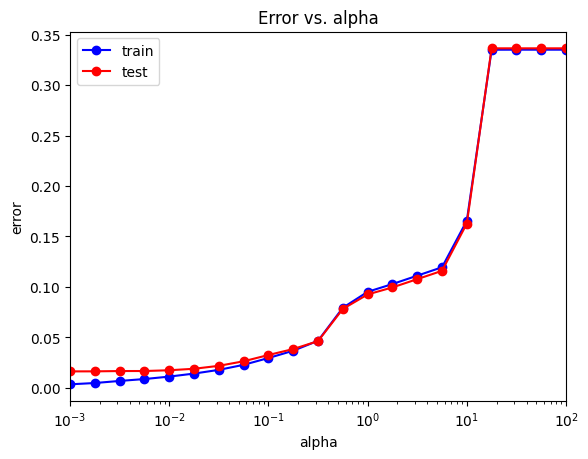

In [99]:

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

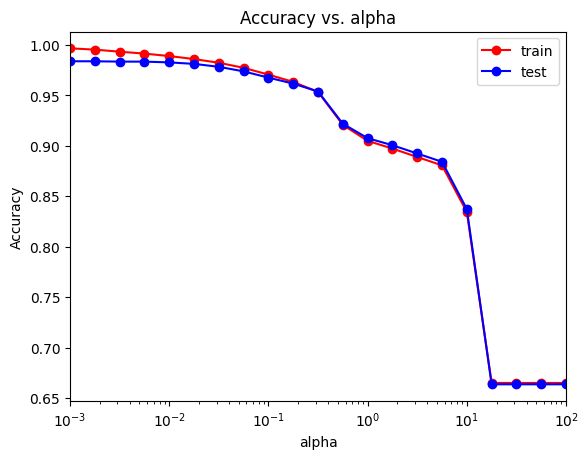

In [100]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [101]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(f"{min_train_err=}\n{min_test_err=}")

min_train_err=0.0034819858088138513
min_test_err=0.016305106513666696


In [108]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(f"{alpha_opt=}")

alpha_opt=array([0.001])


### Полносвязная неглубокая нейронная сеть с оптимальных alpha (adam solver)

In [110]:
alpha_opt = alpha_opt[0]
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (20,),
                          solver = 'adam', activation = 'logistic', random_state = 7, max_iter=100)
mlp_model.fit(X_train, y_train)

y_test_predict = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


err_train=0.0034819858088138513
err_test=0.016305106513666696

train confusion matrix:
[[27848   160]
 [  131 55434]]

test confusion matrix:
[[11738   314]
 [  270 23495]]



### Результаты

Проведенные эксперименты показывают следующее: лучшую точность показывает метод Random Forest, лучшую скорость обучения - алгоритм линейной регрессии. Неглубокая нейронная сеть (20 скрытых слоев) показывает средние результаты (точность выче, чем у линейной регрессии, а скорость обучения выше, чем у Random Forest).

В целом, точность на тренировочной выборке у всех методов выше (хотя не то, чтобы значительно), чем на тестовой, что может свидетельствовать о небольшом переобучении всех моделей.

Подбор параметра alpha в данном случае помог улучшить точность нейронной сети незначительно (прирост менее 1%).